In [ ]:
'''Assignment 1: The sinking of the Titanic is one of the most infamous
shipwrecks in
history. On April 15, 1912, during her maiden voyage, the widely
considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
Unfortunately, there weren’t
enough lifeboats for everyone onboard, resulting in the death of 1502
out of 2224
passengers and crew. While there was some element of luck involved in
surviving, it seems some groups of
people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the
question: “what sorts of people were more likely to survive?” using
passenger data (ie name, age, gender, socio-economic class, etc). Dataset
link: https://www.kaggle.com/c/titanic/data'''

'Assignment 1: The sinking of the Titanic is one of the most infamous\nshipwrecks in\nhistory. On April 15, 1912, during her maiden voyage, the widely\nconsidered “unsinkable” RMS Titanic sank after colliding with an iceberg.\nUnfortunately, there weren’t\nenough lifeboats for everyone onboard, resulting in the death of 1502\nout of 2224\npassengers and crew. While there was some element of luck involved in\nsurviving, it seems some groups of\npeople were more likely to survive than others.\nIn this challenge, we ask you to build a predictive model that answers the\nquestion: “what sorts of people were more likely to survive?” using\npassenger data (ie name, age, gender, socio-economic class, etc). Dataset\nlink: https://www.kaggle.com/c/titanic/data'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train2.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-8-7425dc86339b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.skew(),kde=True)
<ipython-input-8-7425dc86339b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.skew(),kde=True)


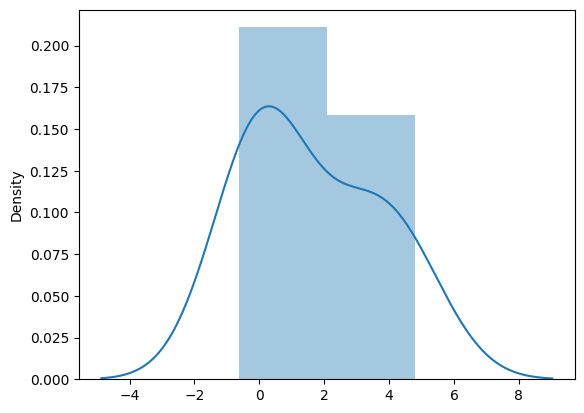

In [ ]:
sns.distplot(df.skew(),kde=True)
plt.show()

In [ ]:
df.drop(['Cabin','PassengerId','Ticket','Name'],axis =1,inplace = True)

In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


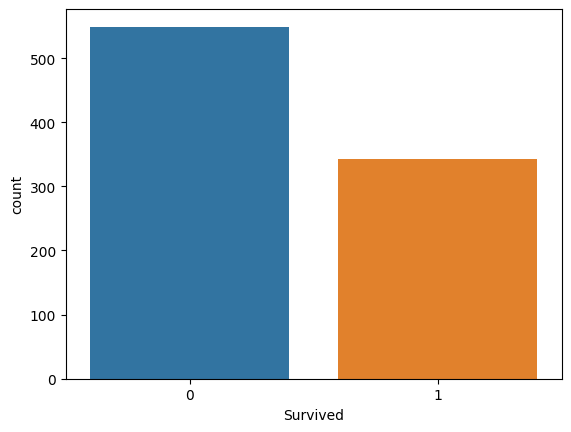

In [ ]:
sns.countplot(x='Survived',data=df)
plt.show()

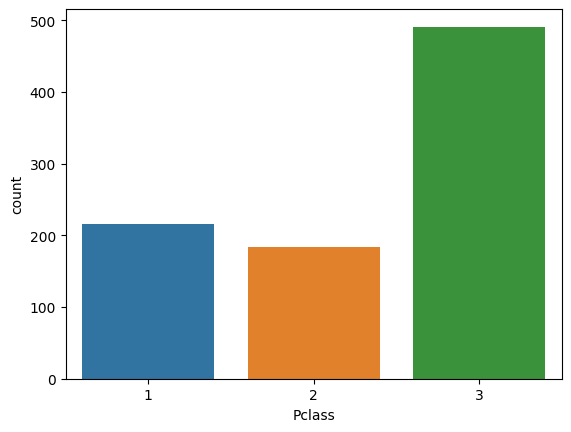

In [ ]:
sns.countplot(x='Pclass',data=df)
plt.show()

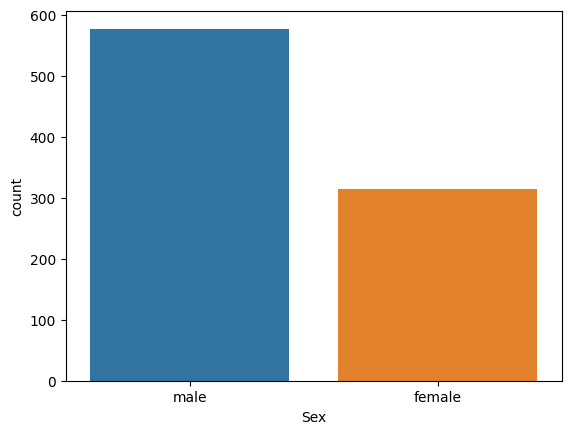

In [ ]:
sns.countplot(x='Sex',data=df)
plt.show()

<ipython-input-16-3158205c8616>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],kde=True)


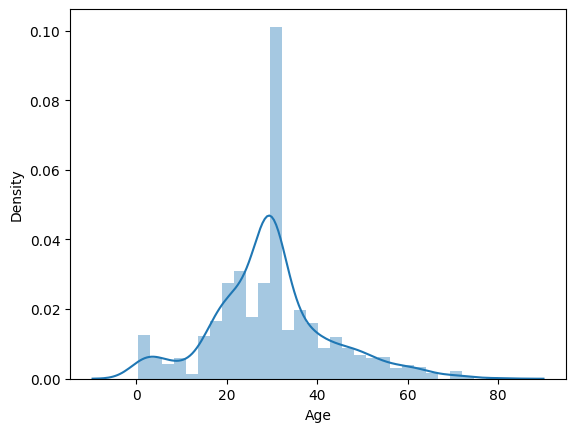

In [ ]:
sns.distplot(df["Age"],kde=True)
plt.show()

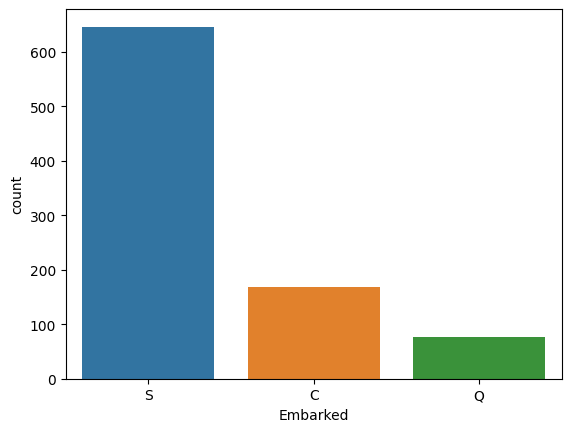

In [ ]:
sns.countplot(x='Embarked',data=df)
plt.show()

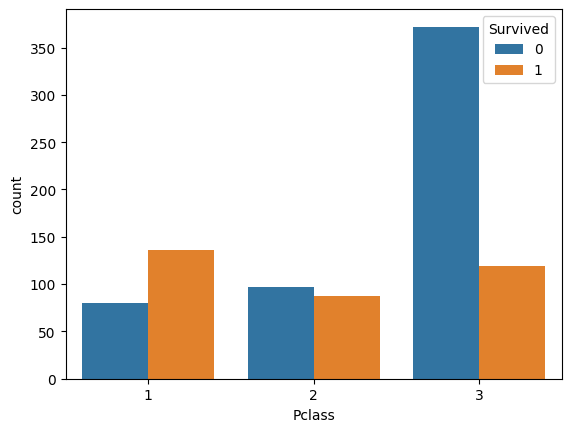

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

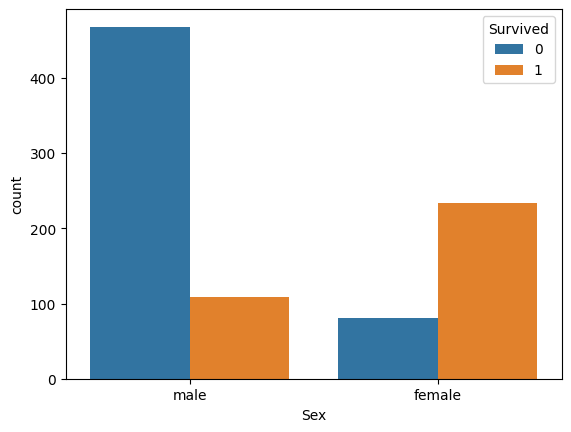

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

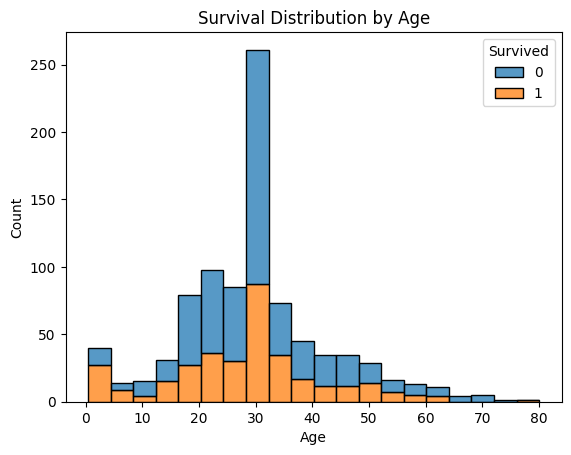

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

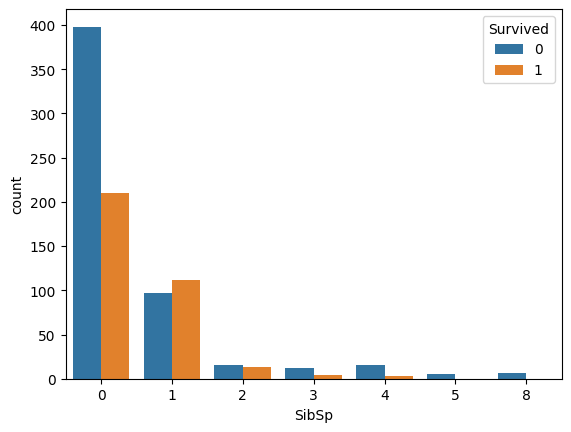

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.show()

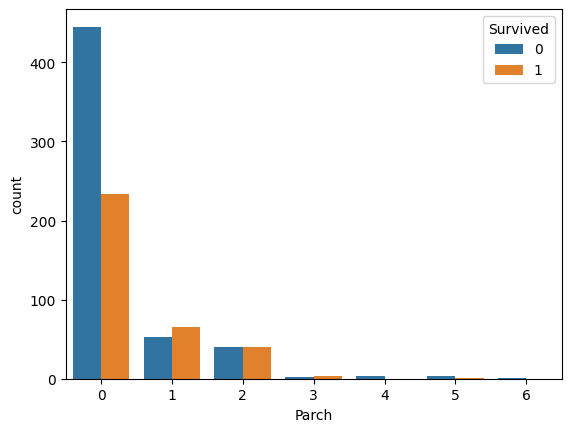

In [ ]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.show()

<ipython-input-23-2762f0762425>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True,cmap="coolwarm")


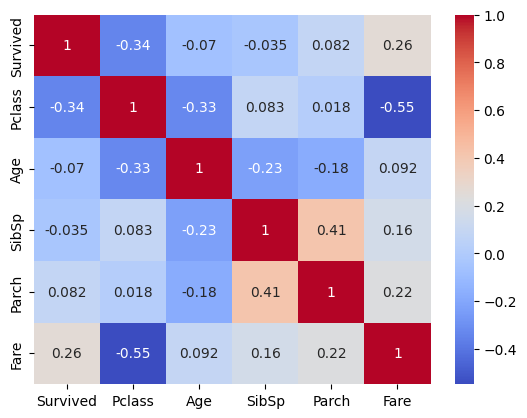

In [ ]:
sns.heatmap(df.corr(),annot= True,cmap="coolwarm")
plt.show()

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# Convert 'Embarked' column to numbers
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
X = df.drop(["Survived"],axis=1)
y = df["Survived"].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693,  1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.56883712],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
(X_train.shape) ,(X_test.shape),(y_train.shape),(y_test.shape)

((712, 7), (179, 7), (712,), (179,))

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/50
23/23 [==============================] - 1s 4ms/step - loss: 0.6269 - accuracy: 0.6671
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.8188
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8244
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4136 - accuracy: 0.8301
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8399
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8385
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.3960 - accuracy: 0.8385
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8385
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8371
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8399
Epoch 11/50
23/23 [

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score: {accuracy}")

6/6 [==============================] - 0s 5ms/step
Accuracy Score: 0.8156424581005587
